LetsGrowMore-August2022

Architha Shevella-Data Science Intern

Stock Market Prediction and Forcasting using Stacked LSTM

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Importing the required libraries

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# Ignoring warnings
import warnings
warnings.filterwarnings("ignore")

Reading the Data

In [3]:
dataset_link = "nse.csv"
data = pd.read_csv(dataset_link)
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


Exploring Data and Making required changes for better understanding 

In [4]:
data.isnull().sum()
# No null values so we can proceed

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [5]:
data['Date'] = pd.to_datetime(data['Date'])

In [6]:
df = data.sort_values('Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [7]:
df.reset_index(inplace=True)

Visualizing the Data

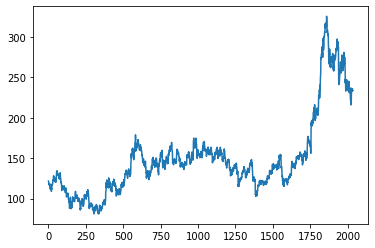

In [8]:
plt.plot(df['Close'])

In [9]:
df_close = df['Close']
df_close

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

In [10]:
scaler = MinMaxScaler(feature_range=(0,1))

In [11]:
df_close = scaler.fit_transform(np.array(df_close).reshape(-1,1))
df_close

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [14]:
training_size = int(len(df_close)*0.70)
test_size = len(df_close) - training_size
train, test = df_close[0: training_size,:], df_close[training_size : len(df_close),:1]

In [12]:
# Let us convert the array values previously calculated into a matrix
def create_mat(ds, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(ds)-time_step-1):
        a = ds[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(ds[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [15]:
time_step = 100
X_train, y_train = create_mat(train, time_step)
X_test, y_test = create_mat(test, time_step)

In [16]:
X_train.shape

(1323, 100)

In [17]:
y_train.shape

(1323,)

In [18]:
X_test.shape

(510, 100)

In [19]:
y_test.shape

(510,)

In [20]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

It is now time to Create the LSTM Model

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [22]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(X_train, y_train, validation_split=0.1, epochs= 60, batch_size=64, verbose = 1)

Epoch 1/60
19/19 [==============================] - 11s 273ms/step - loss: 0.0102 - val_loss: 0.0018
Epoch 2/60
19/19 [==============================] - 4s 200ms/step - loss: 0.0022 - val_loss: 0.0017
Epoch 3/60
19/19 [==============================] - 4s 208ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 4/60
19/19 [==============================] - 4s 199ms/step - loss: 8.9106e-04 - val_loss: 0.0012
Epoch 5/60
19/19 [==============================] - 4s 204ms/step - loss: 9.3205e-04 - val_loss: 0.0013
Epoch 6/60
19/19 [==============================] - 4s 203ms/step - loss: 8.3194e-04 - val_loss: 0.0011
Epoch 7/60
19/19 [==============================] - 4s 194ms/step - loss: 8.1514e-04 - val_loss: 0.0011
Epoch 8/60
19/19 [==============================] - 4s 194ms/step - loss: 7.9342e-04 - val_loss: 0.0010
Epoch 9/60
19/19 [==============================] - 4s 205ms/step - loss: 7.4207e-04 - val_loss: 9.7447e-04
Epoch 10/60
19/19 [==============================] - 4s 208ms/step - lo

Now, it is time to Predict

In [24]:
predictions = model.predict(X_test)

In [25]:
# performing inverse transform on predictions
inv_predictions = scaler.inverse_transform(predictions)

In [26]:
inv_predictions

array([[143.15851 ],
       [143.34416 ],
       [142.4768  ],
       [139.85487 ],
       [138.10612 ],
       [137.52808 ],
       [138.69942 ],
       [140.35147 ],
       [140.85275 ],
       [140.4767  ],
       [140.1306  ],
       [141.17682 ],
       [141.99281 ],
       [143.54765 ],
       [145.73781 ],
       [143.93987 ],
       [141.44205 ],
       [140.89066 ],
       [141.51955 ],
       [146.45125 ],
       [151.07683 ],
       [153.41342 ],
       [153.70662 ],
       [151.52974 ],
       [151.06879 ],
       [150.8603  ],
       [151.36156 ],
       [153.1302  ],
       [154.0143  ],
       [154.05327 ],
       [154.35071 ],
       [153.19481 ],
       [149.97722 ],
       [144.32877 ],
       [140.76067 ],
       [139.71864 ],
       [139.9413  ],
       [139.25903 ],
       [136.98062 ],
       [133.23134 ],
       [130.49898 ],
       [129.1633  ],
       [127.152115],
       [126.28744 ],
       [124.36736 ],
       [121.804924],
       [120.96403 ],
       [120.6

In [27]:
import math
from sklearn.metrics import mean_squared_error

In [28]:
mse = math.sqrt(mean_squared_error(y_test, predictions))
print("The Mean Squared Error for above model is: ", mse)

The Mean Squared Error for above model is:  0.03446368171043809
